# Module 3 Practice 2 - Mixed effects in longitudinal blood pressure data

In this practice exercise you will practice conducting and evaluating a model comprised of longitudinal data plus some fixed effects.  The goal will be to identify if systolic blood pressure can be predicted by the other features in the data.

We are using data sourced from the NHANES data repository.

The documentation for our data file is [here](../resources/bp.txt).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install --upgrade "statsmodels==0.11"

import statsmodels.api as sm

Requirement already up-to-date: statsmodels==0.11 in /opt/conda/lib/python3.7/site-packages (0.11.0)


## Load data


In [2]:
data = pd.read_csv('../resources/bp.csv')

display(data.head(15))

,seq,age,male,bmi,bp_type,bp_seq,bp_value
0,62161,22.0,1,23.3,S,1,110.0
1,62161,22.0,1,23.3,D,2,68.0
2,62161,22.0,1,23.3,S,3,118.0
3,62161,22.0,1,23.3,D,3,74.0
4,62161,22.0,1,23.3,S,2,104.0
5,62161,22.0,1,23.3,D,1,82.0
6,62163,14.0,1,17.3,S,2,108.0
7,62163,14.0,1,17.3,D,3,38.0
8,62163,14.0,1,17.3,S,3,106.0
9,62163,14.0,1,17.3,D,2,36.0


## Subset the data

Because fitting a LMM on data can be time consuming on large datasets, we are going to limit this dataset to 10% of the total.  recall from Lab 3 that we need to be careful about how we subset our data, so as to preserve the data groupings.

Rather than create training and testing datasets though, we will be training our model on the full subset.

Apply the last technique from Lab 3 to create a subset of the data that contains 10% of the original unique subjects.  Also, select only those rows where the bp_type is `S`, as we will only build a model for systolic bp in this exercise.


In [3]:
# your code here

seqs = pd.Series(data['seq'].unique()).sample(frac=0.1, random_state=42)

subset = data[data['seq'].isin(seqs)]

print('total rows:      ', data['seq'].count())
print('subset rows:     ', subset['seq'].count())

subset = subset[subset['bp_type'] == 'S']
print('systolic subset: ', subset['seq'].count())


total rows:       41598
subset rows:      4162
systolic subset:  2081


## Visualize the data

We want to visualize our data to better understand it, which will help to specify a better model.  Use boxplots to look at the data for `bp_value` by the various features in the data.

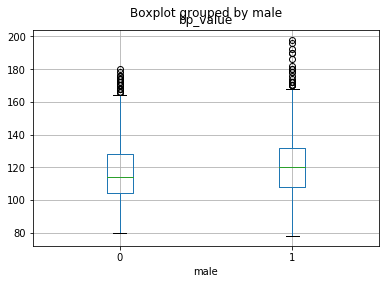

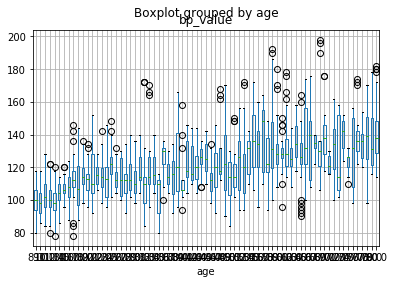

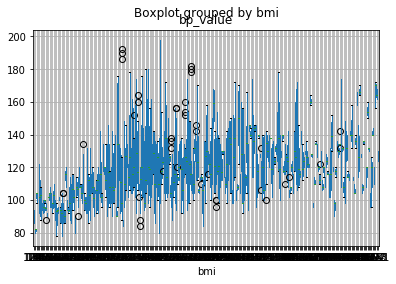

In [4]:
# your code here

subset.boxplot(column='bp_value', by='male')
plt.show()

subset.boxplot(column='bp_value', by='age')
plt.show()

subset.boxplot(column='bp_value', by='bmi')
plt.show()



## Model Systolic blood pressure using one fixed and one random effect

Create a model using a random intercept, and using `male` as a fixed effect.

In [5]:
# your code here

model = sm.MixedLM.from_formula("bp_value ~ male", groups="seq", data=subset)
result = model.fit()


## Print the results and interpret the model

Use the output to answer the following questions:

**What is the baseline systolic blood pressure?**

**How much does the baseline increase when the subject is female?**

**How much does the baseline increase when the subject is male?**

**What does the `Coef.` value for `seq Var` tell us about the model?**

**What does `Scale` tell us about the models uncertainty?**

In [6]:
# your code here

print(result.summary())
print(result.random_effects)

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: bp_value  
No. Observations: 2081    Method:             REML      
No. Groups:       698     Scale:              15.4794   
Min. group size:  1       Log-Likelihood:     -7258.8768
Max. group size:  3       Converged:          Yes       
Mean group size:  3.0                                   
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept 116.721    1.006 116.008 0.000 114.749 118.693
male        4.619    1.397   3.306 0.001   1.881   7.358
seq Var   334.896    5.681                              

{62185: seq   -3.289979
dtype: float64, 62187: seq   -22.376662
dtype: float64, 62193: seq    17.719654
dtype: float64, 62205: seq   -1.320326
dtype: float64, 62215: seq    15.046748
dtype: float64, 62230: seq   -17.734103
dtype: float64, 62248: seq    9.841042
dtype:

**What is the baseline systolic blood pressure?**

It is the intercept, 116.721

**How much does the baseline increase when the subject is female?**

When the subject is female, no adjustment is made because the coefficient for the `male` variable is multiplied by the value for female of `0`, therefore the term becomes zero.

**How much does the baseline increase when the subject is male?**

When the subject is male, the baseline is increased by 4.619, the value of the coefficient for the `male` variable.

**What does the `Coef.` value for `seq Var` tell us about the model?**

The variance of the per subject random intercepts is 334.896.  The standard deviation is the square root of the variance and is 18.3.  This means that approximately 68% of the systolic blood pressure values for the subjects are within $\pm$ 18.3 of the fixed intercept adjusted by `male`

**What does `Scale` tell us about the models uncertainty?**

The scale represents the error variance for the model.  The standard deviation is 3.93, so 68% of the fitted values are within 3.93 of the actual value for `bp_value`.

## Fit a full model with one random intercept and the remaining variables as fixed

In [7]:
# your code here

model = sm.MixedLM.from_formula('bp_value ~ age + male + bmi', groups='seq', data=subset)

result = model.fit()

## Print the results and interpret the model
Use the output to answer the following questions:

**Does the overall model variance change?**

**Does the coefficient for the variable `male` change?**

**Is the random intercept variance lower or higher, and is that good or bad for the model?**

**Based on the values of the coefficients, and with other features held constant, does BP go up or down as a person ages?**

**Based on the values of the coefficient, and with other features held constant, does BP go up or down as a person's BMI increases?**

In [8]:
# your code here

print(result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: bp_value  
No. Observations: 2081    Method:             REML      
No. Groups:       698     Scale:              15.4795   
Min. group size:  1       Log-Likelihood:     -7072.7935
Max. group size:  3       Converged:          Yes       
Mean group size:  3.0                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     86.741    2.149 40.358 0.000 82.528 90.953
age            0.464    0.026 18.146 0.000  0.414  0.514
male           4.817    1.065  4.523 0.000  2.729  6.904
bmi            0.450    0.080  5.651 0.000  0.294  0.606
seq Var      192.065    3.299                           



**Does the overall model variance change?**

The `Scale` is essentially the same, differing by just .0001.

**Does the coefficient for the variable `male` change, and if so what is the effect in the model?**

Yes, the effect of being male in the larger model increases the syslotic bp by about 0.2.

**Is the random intercept variance lower or higher, and is that good or bad for the model?**

The random intercept variance is lower, which indicates that there is less uncertainty within the groups, which has now been accounted for the the addition of the two new features.  This is generally good for the model.

**Based on the values of the coefficient, and with other features held constant, does BP go up or down as a person ages?**

The coefficient is positive, so BP will go up as the age goes up.

**Based on the values of the coefficient, and with other features held constant, does BP go up or down as a person's BMI increases?**

The coefficient is positive, so BP will go up as the BMI goes up.


## Compare the model with just the `male` variable to the full model

Make a comparison between the two models.  Would we reject the Null Hypothesis that the model with just `male` is equal to the full model, at a significance level of $\alpha$ = 0.05?

In [9]:
# your code here

# define a function to perform the lr test and return the p value
from scipy import stats
def lrtest(llf_null, llf_full):
    lr = 2 * (llf_full - llf_null)
    p = stats.chi2.sf(lr, 1) # chisquared test with one degree of freedom
    return lr, p # return the likelihood ratio and the p value from the chisquared test


model = sm.MixedLM.from_formula('bp_value ~ age + male + bmi', groups='seq', data=subset)
result = model.fit(reml=False)
llf_full = result.llf

model = sm.MixedLM.from_formula('bp_value ~ male', groups='seq', data=subset)
result = model.fit(reml=False)
llf_null = result.llf

chi_sq, p_value = lrtest(llf_null, llf_full)

if p_value <= 0.05:
    print(f'The pvalue of {p_value} is below 0.05, therefore we reject the Null that the models are equal, and instead support that the full model is better. Adding age and bmi improves the model performance.')
else:    
    print(f'The pvalue of {p_value} is above 0.05, therefore we fail to reject the Null Hypothesis that the models are equal.  Adding age and bmi do not improve the model performance.')


The pvalue of 4.280631138609103e-85 is below 0.05, therefore we reject the Null that the models are equal, and instead support that the full model is better. Adding age and bmi improves the model performance.


your answer here

The pvalue of 4.280631138609103e-85 is below 0.05, therefore we reject the Null that the models are equal, and instead support that the full model is better. Adding age and bmi improves the model performance.